In [3]:
import xarray as xr
import datetime
import pymannkendall as mk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import theilslopes
from dask.diagnostics import ProgressBar
import pymannkendall as mk

import pandas as pd
import datetime

In [4]:
# load landcover and anette's landcover! (first normal landcover)
land_cover = xr.open_dataset('/mnt/data7/nfs4/avh_ndvi/sdupuis/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc', engine='netcdf4')

In [5]:
land_cover

<xarray.Dataset>
Dimensions:              (lat: 64800, lon: 129600)
Coordinates:
  * lat                  (lat) float32 90.0 90.0 89.99 ... -89.99 -90.0 -90.0
  * lon                  (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    lccs_class           (lat, lon) float32 ...
    processed_flag       (lat, lon) float32 ...
    current_pixel_state  (lat, lon) float32 ...
    observation_count    (lat, lon) float32 ...
    change_count         (lat, lon) float32 ...
    crs                  int32 ...
Attributes: (12/38)
    title:                      ESA CCI Land Cover Map
    summary:                    This dataset contains the global ESA CCI land...
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y
    id:                         ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-landcover-cci.org/
    ...                         ...
    geospatial_lon_max:         180.0
    spatial_resolution:         300m
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.002778
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.002778

In [6]:
lc = land_cover.sel(lat=slice(72,55), lon=slice(-168,-150))

In [7]:
lst_2001 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2001/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [8]:
lst_2002 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2002/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [9]:
lst_2003 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2003/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [10]:
lst_2004 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2004/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [11]:
lst_2005 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2005/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [12]:
lst_2006 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2006/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [13]:
lst_2007 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2007/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [14]:
lst_2008 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2008/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [15]:
lst_2009 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2009/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [16]:
lst_2010 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2010/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [17]:
lst_2011 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2011/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [18]:
lst_2012 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2012/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [19]:
lst_2013 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2013/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [20]:
lst_2014 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2014/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [21]:
lst_2015 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2015/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [22]:
lst_2016 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2016/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [23]:
lst_2017 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2017/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [24]:
lst_2018 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2018/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [25]:
lc_interp = lc.interp(lat=lst_2018.coords['lat'], lon=lst_2018.coords['lon'], method='nearest')

In [26]:
def semimonth_time(time):
    year = time.dt.year
    month = time.dt.month

    day = xr.where(time.dt.day <= 15, 1, 16)
    #print(day)

    ymd = year * 10000 + month * 100 + day

    return xr.apply_ufunc(
        pd.to_datetime,
        ymd,
        kwargs={"format": "%Y%m%d"},
        vectorize=True,
        output_dtypes=["datetime64[ns]"],
    )

In [27]:
results = []

for year in range(2001, 2018):

    ds = globals()[f"lst_{year}"]

    # --------------------------------------------------
    # 2. Mask unwanted landcover
    # --------------------------------------------------
    ds = ds.where(lc_interp['lccs_class'] != 210)

    # --------------------------------------------------
    # 3. Remove clouds (flag = 110)
    # --------------------------------------------------
    clean_LST = ds['LST'].where(ds['LST'] != 110)

    # --------------------------------------------------
    # 4. Create semi-monthly bins
    # --------------------------------------------------
    clean_LST = clean_LST.assign_coords(
        semimonth_time=semimonth_time(clean_LST.time)
    )

    # --------------------------------------------------
    # 5. Aggregate (MAX per semi-month)
    # --------------------------------------------------
    semi_month_max = (
        clean_LST
        .groupby("semimonth_time")
        .max()
        .rename({"semimonth_time": "time"})
    )

    results.append(semi_month_max)


/tmp/ipykernel_27928/766118834.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(
/tmp/ipykernel_27928/766118834.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead 

In [28]:
lst_semimonth = xr.concat(results, dim="time").sortby("time")

In [29]:
print(semi_month_max.time[1:8].values)


['2017-01-16T00:00:00.000000000' '2017-02-01T00:00:00.000000000'
 '2017-02-16T00:00:00.000000000' '2017-03-01T00:00:00.000000000'
 '2017-03-16T00:00:00.000000000' '2017-04-01T00:00:00.000000000'
 '2017-04-16T00:00:00.000000000']


In [30]:
lst_semimonth

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 408)>
dask.array<concatenate, shape=(800, 7200, 408), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2001-01-01 2001-01-16 ... 2017-12-16

In [31]:
# by-monthly seems ok


month = lst_semimonth.time.dt.month
day   = lst_semimonth.time.dt.day

# 0 = first half (01), 1 = second half (16)
half = xr.where(day == 1, 0, 1)

bin_index = (month - 1) * 2 + half + 1

lst_semimonth = lst_semimonth.assign_coords(bin=bin_index)


In [32]:
lst_semimonth

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 408)>
dask.array<concatenate, shape=(800, 7200, 408), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2001-01-01 2001-01-16 ... 2017-12-16
    bin          (time) int64 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24

In [33]:
np.unique(lst_semimonth.bin.values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [34]:
lst_semimonth

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 408)>
dask.array<concatenate, shape=(800, 7200, 408), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2001-01-01 2001-01-16 ... 2017-12-16
    bin          (time) int64 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24

/local/sdupuis/software/conda/envs/rioxarray_env/lib/python3.11/site-packages/dask/array/reductions.py:649: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


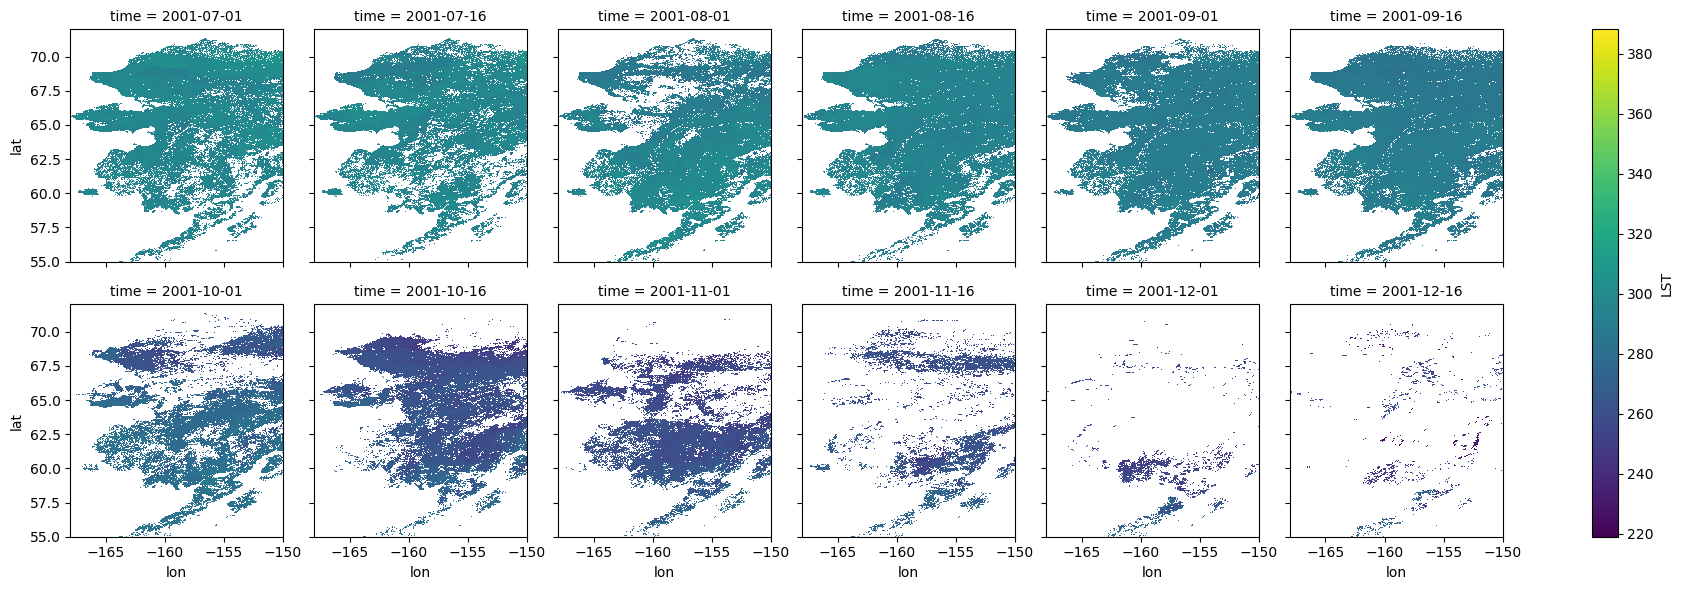

In [35]:
lst_semimonth.sel(lat=slice(55,72), lon=slice(-168,-150), time=slice('2001-07','2001-12')).plot(x="lon", y="lat", col="time", col_wrap=6);

In [36]:
climatology = lst_semimonth.groupby("bin").mean("time")

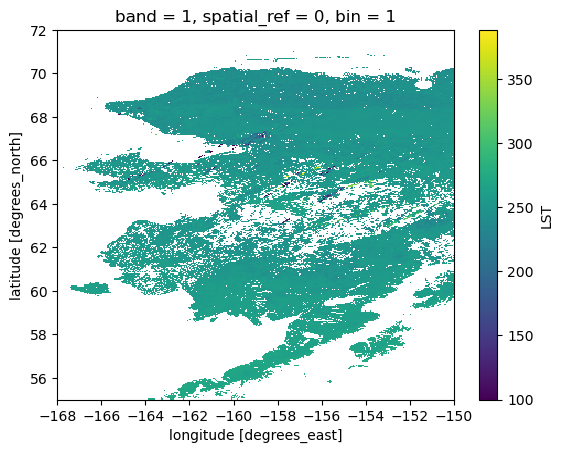

In [37]:
climatology.sel(lat=slice(55,72), lon=slice(-168,-150)).isel(bin=0).plot();
# strange values !!!

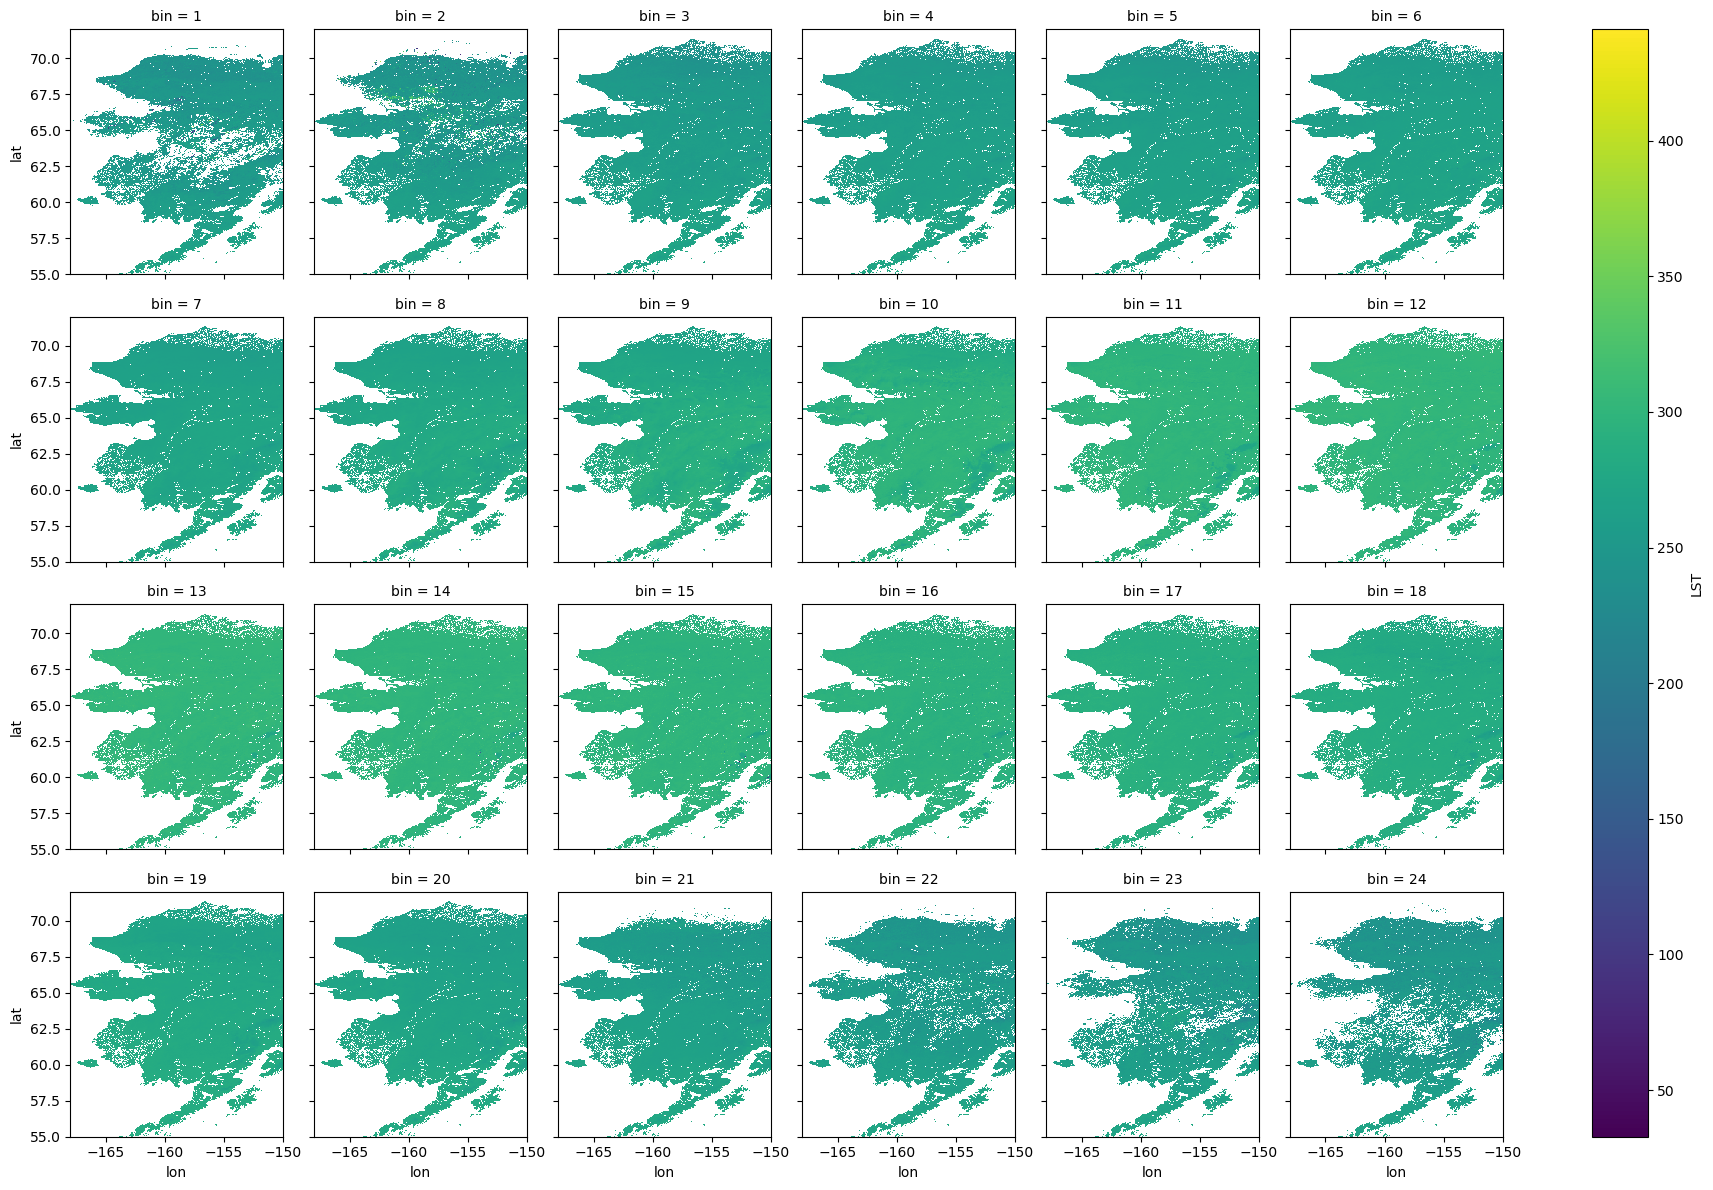

In [38]:
climatology.sel(lat=slice(55,72), lon=slice(-168,-150)).plot(x="lon", y="lat", col="bin", col_wrap=6);

In [39]:
anomalies = lst_semimonth.groupby("bin") - climatology

/local/sdupuis/software/conda/envs/rioxarray_env/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 17 times more chunks
  return self.array[key]


In [40]:
anomalies

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 408)>
dask.array<sub, shape=(800, 7200, 408), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    spatial_ref  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * time         (time) datetime64[ns] 2001-01-01 2001-01-16 ... 2017-12-16
    bin          (time) int64 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24

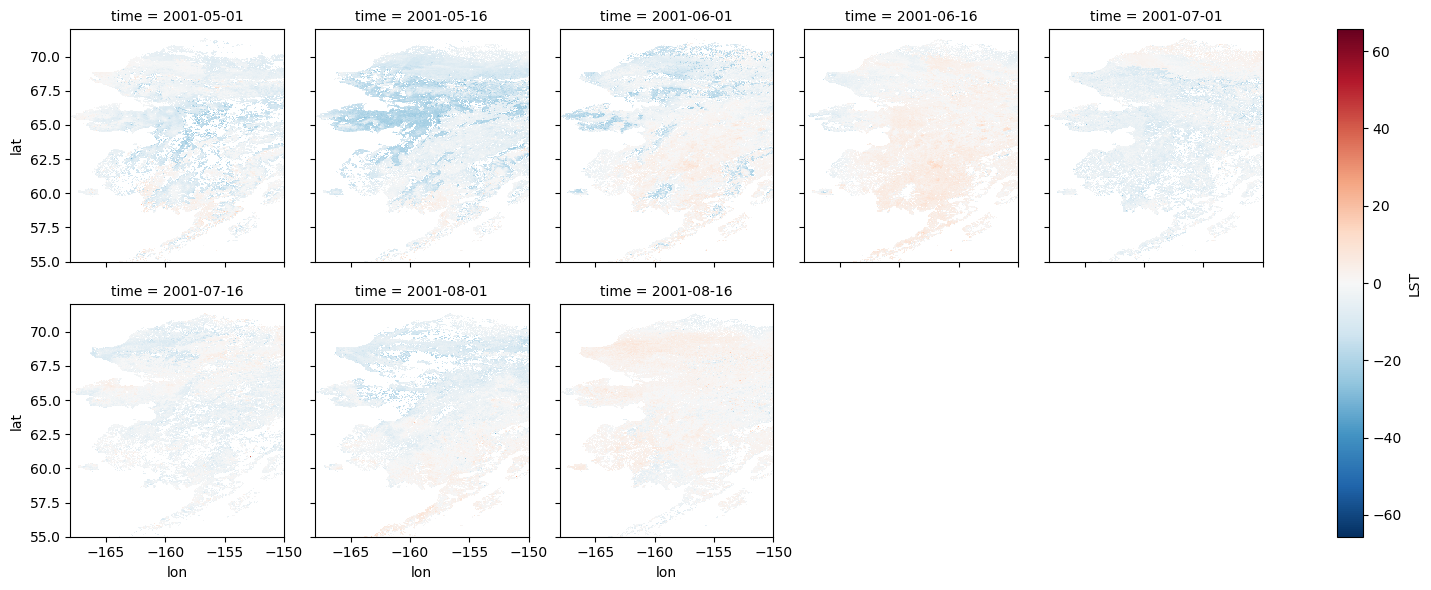

In [41]:
anomalies.sel(lat=slice(55,72), lon=slice(-168,-150), time=slice('2001-05','2001-08')).plot(x="lon", y="lat", col="time", col_wrap=5);
#plt.savefig('anomalies.png')

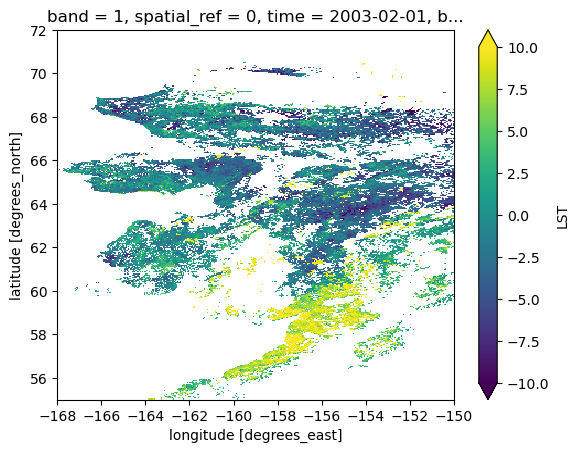

In [42]:
anomalies.sel(lat=slice(55,72), lon=slice(-168,-150)).isel(time=50).plot(vmax=10, vmin=-10);

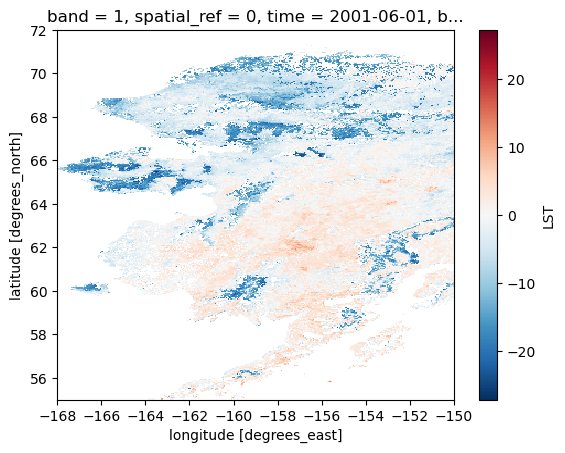

In [43]:
anomalies.sel(lat=slice(55,72), lon=slice(-168,-150)).isel(time=10).plot();

In [44]:
anoms = anomalies.sel(lat=slice(55,72), lon=slice(-168,-150))
anoms = anoms.chunk(dict(time=-1))   # <<< REQUIRED

In [45]:
time_numeric = (
    anoms.time.dt.year +
    (anoms.time.dt.dayofyear - 1) / 365.0
)


In [46]:
time_numeric.values

array([2001.        , 2001.04109589, 2001.08493151, 2001.1260274 ,
       2001.16164384, 2001.20273973, 2001.24657534, 2001.28767123,
       2001.32876712, 2001.36986301, 2001.41369863, 2001.45479452,
       2001.49589041, 2001.5369863 , 2001.58082192, 2001.62191781,
       2001.66575342, 2001.70684932, 2001.74794521, 2001.7890411 ,
       2001.83287671, 2001.8739726 , 2001.91506849, 2001.95616438,
       2002.        , 2002.04109589, 2002.08493151, 2002.1260274 ,
       2002.16164384, 2002.20273973, 2002.24657534, 2002.28767123,
       2002.32876712, 2002.36986301, 2002.41369863, 2002.45479452,
       2002.49589041, 2002.5369863 , 2002.58082192, 2002.62191781,
       2002.66575342, 2002.70684932, 2002.74794521, 2002.7890411 ,
       2002.83287671, 2002.8739726 , 2002.91506849, 2002.95616438,
       2003.        , 2003.04109589, 2003.08493151, 2003.1260274 ,
       2003.16164384, 2003.20273973, 2003.24657534, 2003.28767123,
       2003.32876712, 2003.36986301, 2003.41369863, 2003.45479

In [47]:
def theil_sen_1d(y, x):
    # remove NaNs
    mask = np.isfinite(y) & np.isfinite(x)
    
    # not enough data points → return NaN
    if mask.sum() < 5:
        return np.nan
    
    slope, intercept, lower, upper = theilslopes(y[mask], x[mask])
    return slope


In [48]:
def theil_sen_1d_inter(y, x):
    # remove NaNs
    mask = np.isfinite(y) & np.isfinite(x)
    
    # not enough data points → return NaN
    if mask.sum() < 5:
        return np.nan
    
    slope, intercept, lower, upper = theilslopes(y[mask], x[mask])
    return intercept

In [49]:
slope = xr.apply_ufunc(
    theil_sen_1d,
    anoms,
    time_numeric,
    input_core_dims=[["time"], ["time"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

trend_per_decade = slope * 1

In [50]:
slope

<xarray.DataArray (lat: 340, lon: 360)>
dask.array<transpose, shape=(340, 360), dtype=float64, chunksize=(340, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 55.03 55.08 55.12 55.17 ... 71.82 71.88 71.93 71.97
  * lon      (lon) float32 -168.0 -167.9 -167.9 -167.8 ... -150.1 -150.1 -150.0

In [51]:
with ProgressBar():
    res = trend_per_decade.compute()

[##########################              ] | 67% Completed | 18m 42ss

IOStream.flush timed out


[##########################              ] | 67% Completed | 27m 0ss

IOStream.flush timed out


[##########################              ] | 67% Completed | 7hr 37m

IOStream.flush timed out
IOStream.flush timed out


[########################################] | 100% Completed | 7hr 45m


In [52]:
# that won't work because of nans
# do trends on lowess ? 

In [53]:
#res.to_netcdf('annual_lst_trends_alaska.nc')

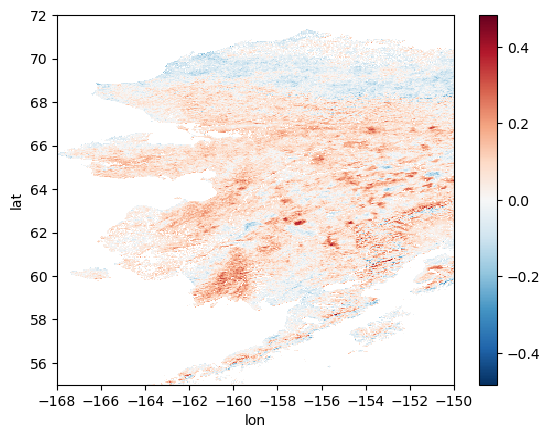

In [54]:
res.plot();
# seems too much!
# comiso and hall same magnitude for Alaska

In [55]:
# spacing of the 10D max bins ? space it like 3 per month ? -> use monthly max ? maybe use bi-monthly
# robustness of trends ? -> maybe 5 points! 
# validtidy of mean for the climatology ? clear-sky biais trend there ?
# clear sky bias ? -> compute number of valid points !
# annual max temp ? - satellites are drifting? -> verify time series, compare with modis! what are the overpass times ? afternoon sats are the warm temperatures !
# compare to MODIS data ? -> maybe few points ?
# mask out with significance ?
# compare with CARRA 

In [56]:
def mk_pvalue(y):
    y = y[np.isfinite(y)]
    if y.size < 5:
        return np.nan
    return mk.original_test(y).p

In [57]:
mk_p = xr.apply_ufunc(
    mk_pvalue,
    anoms,
    input_core_dims=[["time"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

In [58]:
with ProgressBar():
    p_val = mk_p.compute()

[########################################] | 100% Completed | 23m 10s


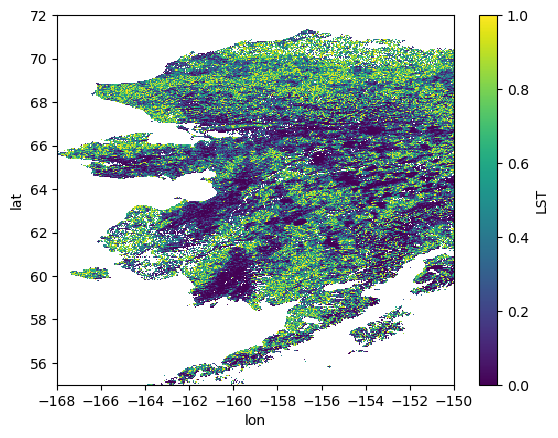

In [59]:
p_val.plot();

In [60]:
significant_trend = res.where(p_val < 0.1)


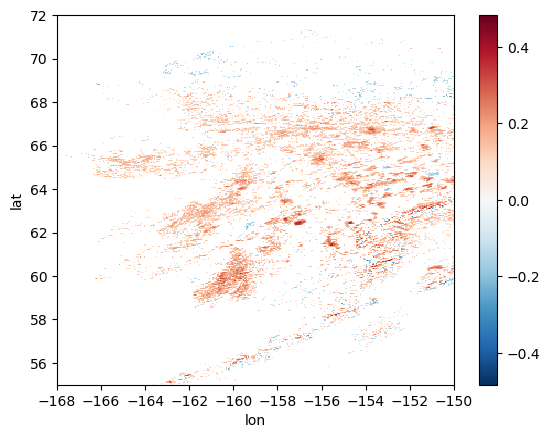

In [61]:
significant_trend.plot();

In [62]:
# verify those trends with CARRA ? or era5 land ? -> keeping only clear sky days! -> Apply the GAC cloud mask ! rather era5 land, because i already have the data

In [63]:
significant_trend.to_netcdf('significant_trends_noaa_2001_2018.nc')

In [64]:
nobs = xr.apply_ufunc(
    lambda y: np.isfinite(y).sum(),
    anoms,
    input_core_dims=[["time"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[int],
)

In [65]:
nobs

<xarray.DataArray 'LST' (lat: 340, lon: 360)>
dask.array<transpose, shape=(340, 360), dtype=int64, chunksize=(340, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 55.03 55.08 55.12 55.17 ... 71.82 71.88 71.93 71.97
  * lon      (lon) float32 -168.0 -167.9 -167.9 -167.8 ... -150.1 -150.1 -150.0

In [ ]:
with ProgressBar():
    n_obs = nobs.compute()

[########################################] | 100% Completed | 20m 14s


: 